## Import Libraries Packages, Downloads

In [1]:
import numpy as np
import pandas as pd
import warnings

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import math as mt

from sklearn.model_selection import train_test_split

## Loading and Processing Data
`Note: (Because none of the processing we are doing involves imputation or such, we are doing the processing before the split)`

In [2]:
warnings.filterwarnings('ignore')


Data = pd.read_csv('/kaggle/input/670-final-data/formatted_data.csv')

## Plotting

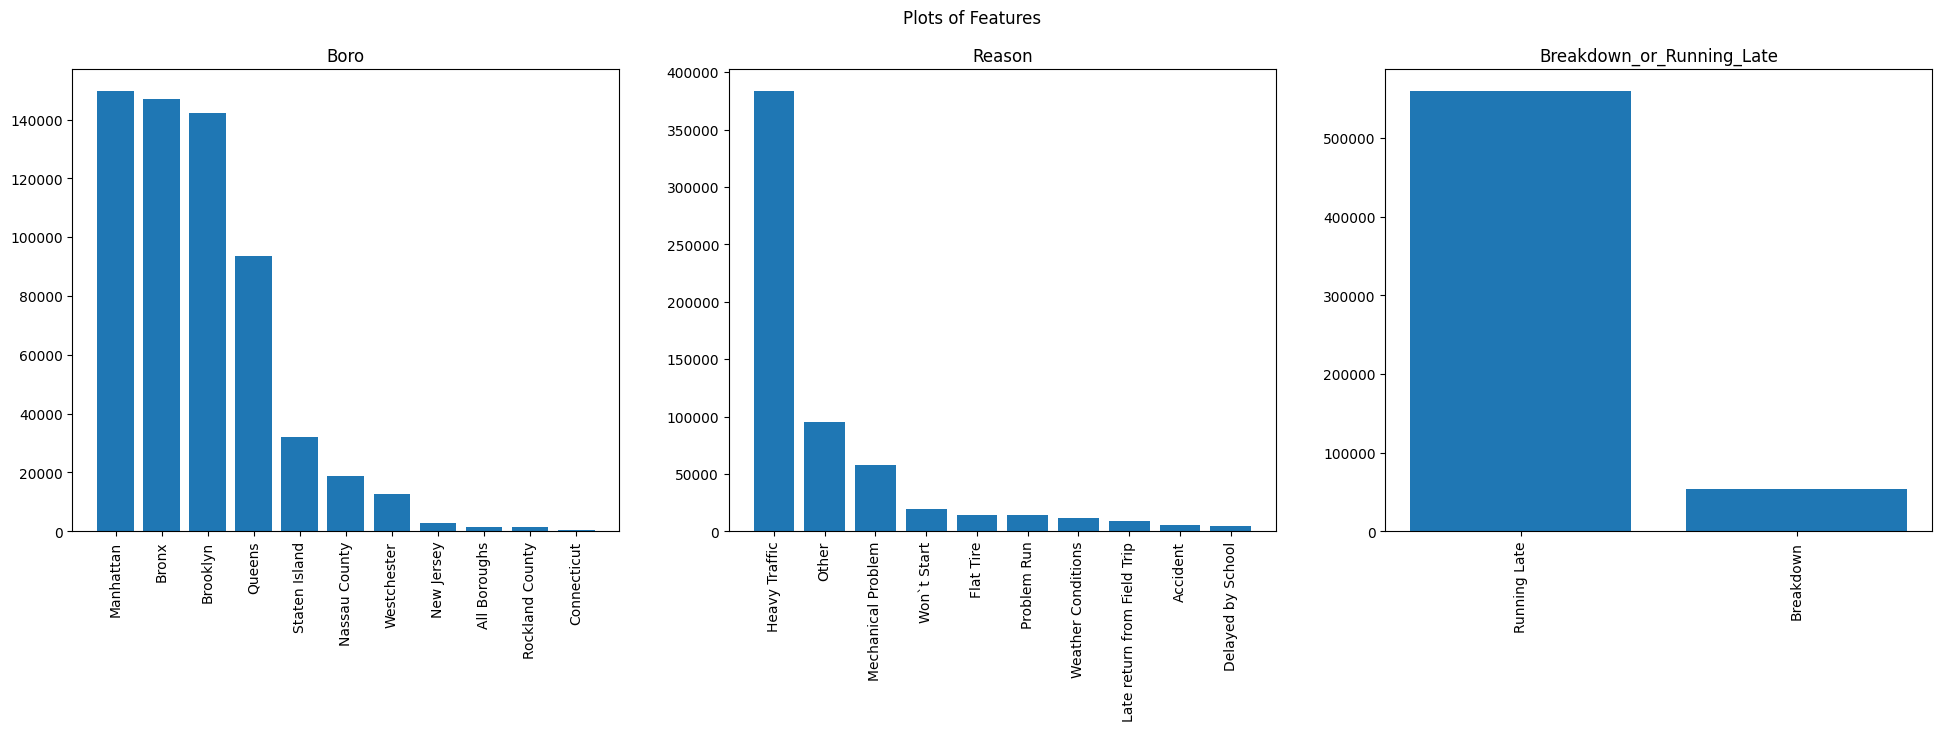

In [3]:
warnings.filterwarnings('ignore')

columns_to_plot_Data = ['Boro', 'Reason', 'Breakdown_or_Running_Late']

fig, axs = plt.subplots(1,3, figsize=(24, 6))
fig.suptitle("Plots of Features")
fig.subplots_adjust(hspace = .5, wspace=.2)
axs = axs.ravel()

i = 0
for column_name in columns_to_plot_Data:

    counts = Data[column_name].value_counts()
    
    # Rotate the tick labels in the second subplot
    axs[i].bar(counts.index, counts.values)
    axs[i].set_title(f"{column_name}")
    axs[i].set_xticklabels(counts.index, rotation=90)
    i += 1



In [4]:
def process(df): 

    #copy dataframe
    data = df.copy()

    #making a dictionary since we need to do a lot of conversion
    to_binary = {'Yes':1, 'No':0}

    #dropping columns we won't be able to use
    data = data.drop(['Busbreakdown_ID', 'Created_On', 
            'Informed_On','Incident_Number', 
            'Last_Updated_On', 'School_Age_or_PreK', 
            'School_Year', 'Route_Number', 'Schools_Serviced',
            'Run_Type', 'Bus_No', 'Bus_Company_Name'], axis = 1)
    
    data = data.dropna(subset=['Boro'])

    #mapping literals to binary values
    data['Breakdown_or_Running_Late'] = data['Breakdown_or_Running_Late'].map({'Breakdown':1, 'Running Late':0})
    data['Has_Contractor_Notified_Parents'] = data['Has_Contractor_Notified_Parents'].map(to_binary)
    data['Has_Contractor_Notified_Schools'] = data['Has_Contractor_Notified_Schools'].map(to_binary)
    data['Have_You_Alerted_OPT'] = data['Have_You_Alerted_OPT'].map(to_binary)

    #getting month/date values
    data['Occurred_On'] = pd.to_datetime(data['Occurred_On'])
    data['Year'] = data['Occurred_On'].dt.year
    data['Month'] = data['Occurred_On'].dt.month
    data['Day'] = data['Occurred_On'].dt.day
    data['Hour'] = data['Occurred_On'].dt.hour
    data['Mins'] = data['Occurred_On'].dt.minute
    data['Weekday'] = data['Occurred_On'].dt.weekday


    data["sin_month"] = np.sin(2*np.pi*data["Month"]/max(data["Month"]))
    data["cos_month"] = np.cos(2*np.pi*data["Month"]/max(data["Month"]))
    data["sin_hour"] = np.sin(2*np.pi*data["Hour"]/max(data["Hour"]))
    data["cos_hour"] = np.cos(2*np.pi*data["Hour"]/max(data["Hour"]))
    data["sin_mins"] = np.sin(2*np.pi*data["Mins"]/max(data["Mins"]))
    data["cos_mins"] = np.cos(2*np.pi*data["Mins"]/max(data["Mins"]))

    #one hot encode boro
    for boro in data['Boro'].unique():
        data[boro] = (data['Boro'] == boro).astype(int)

    # one hot encode breakdown reason
    for reason in data['Reason'].unique():
        data[reason] = (data['Reason'] == reason).astype(int)

    data = data.drop(['Boro'], axis = 1)
    data = data.drop(['Reason'], axis = 1)

    #plot some features

#     i = 0
#     columns_to_plot_df = ['Month', 'Day', 'Hour', 'Weekday']

#     fig, axs = plt.subplots(1,4, figsize=(24, 6))
#     fig.suptitle("Plots of Features")
#     fig.subplots_adjust(hspace = .5, wspace=.2)
#     axs = axs.ravel()

#     for column_name in columns_to_plot_df:
        
#         counts = data[column_name].value_counts().sort_index()
        
#         # Rotate the tick labels in the second subplot
#         axs[i].bar(counts.index, counts.values)
#         axs[i].set_title(f"{column_name}")
#         i += 1

    data = data.drop(['Month', 'Day', 'Hour', 'Mins'], axis = 1)

    return data


In [5]:
#Process the data
grouped_data = Data.groupby('Boro')
Data_by_boro = {boro: group for boro, group in grouped_data}
df_by_boro = {}
for boro in Data_by_boro.keys():
    df_by_boro[boro] = process(Data_by_boro[boro])


df = process(Data)


In [6]:
df.head()

,Occurred_On,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late,Year,Weekday,sin_month,...,Other,Won`t Start,Flat Tire,Mechanical Problem,Problem Run,Accident,Late return from Field Trip,Delayed by School,Weather Conditions,NaN
0,2015-11-05 08:10:00,-1,11,1,0,1,0,2015,3,-0.5,...,0,0,0,0,0,0,0,0,0,0
1,2015-11-05 08:10:00,0-30,2,1,1,0,0,2015,3,-0.5,...,0,0,0,0,0,0,0,0,0,0
2,2015-11-05 08:09:00,0-30,8,1,1,1,0,2015,3,-0.5,...,0,0,0,0,0,0,0,0,0,0
3,2015-11-05 08:12:00,0-30,6,0,0,0,0,2015,3,-0.5,...,0,0,0,0,0,0,0,0,0,0
4,2015-11-05 08:13:00,-1,6,0,0,0,0,2015,3,-0.5,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# will be used in baseline

value_counts = df['How_Long_Delayed'].value_counts()
majority_class_overall = str(value_counts.idxmax())
print(f"The majority class is: {majority_class}")

The majority class is: 31-60


In [9]:
df_by_boro.keys()

dict_keys(['All Boroughs', 'Bronx', 'Brooklyn', 'Connecticut', 'Manhattan', 'Nassau County', 'New Jersey', 'Queens', 'Rockland County', 'Staten Island', 'Westchester'])

In [10]:
df_by_boro['Bronx'].columns

Index(['Occurred_On', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Breakdown_or_Running_Late', 'Year', 'Weekday',
       'sin_month', 'cos_month', 'sin_hour', 'cos_hour', 'sin_mins',
       'cos_mins', 'Bronx', 'Heavy Traffic', 'Other', 'Flat Tire',
       'Mechanical Problem', 'Won`t Start', 'Late return from Field Trip',
       'Problem Run', 'Accident', 'Delayed by School', 'Weather Conditions'],
      dtype='object')

In [11]:
for boro, df in df_by_boro.items():
    print(boro, len(df['How_Long_Delayed'].unique()))

All Boroughs 4
Bronx 5
Brooklyn 5
Connecticut 4
Manhattan 5
Nassau County 5
New Jersey 5
Queens 5
Rockland County 4
Staten Island 5
Westchester 5


In [12]:
df_by_boro['Bronx']['How_Long_Delayed'].unique()

array(['0-30', '31-60', '-1', '61-90', '91-120'], dtype=object)

In [13]:
df_by_boro['Bronx'].head()

,Occurred_On,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late,Year,Weekday,sin_month,...,Heavy Traffic,Other,Flat Tire,Mechanical Problem,Won`t Start,Late return from Field Trip,Problem Run,Accident,Delayed by School,Weather Conditions
2,2015-11-05 08:09:00,0-30,8,1,1,1,0,2015,3,-0.500000,...,1,0,0,0,0,0,0,0,0,0
11,2015-11-05 08:19:00,31-60,13,1,1,0,0,2015,3,-0.500000,...,1,0,0,0,0,0,0,0,0,0
18,2015-11-05 08:25:00,-1,4,0,0,0,0,2015,3,-0.500000,...,1,0,0,0,0,0,0,0,0,0
19,2015-11-05 08:28:00,0-30,5,1,1,1,0,2015,3,-0.500000,...,1,0,0,0,0,0,0,0,0,0
21,2015-10-26 08:30:00,0-30,5,1,1,0,0,2015,0,-0.866025,...,0,1,0,0,0,0,0,0,0,0


---

Need to aggregate to month. <br>
Combine all entries having same Year and Month. For each group, get the majority Delay bin and use that as the delay bin for the monthly df.

---

In [14]:
monthly_df_by_boro = {}

for boro, df in df_by_boro.items():
    df['Year_Month'] = df['Occurred_On'].dt.to_period('M')
    
    def majority_element(series):
        return series.mode().iloc[0] if not series.empty else None
    
    result = df.groupby('Year_Month')['How_Long_Delayed'].agg(majority_element).reset_index()
    result.columns = ['Year_Month', 'Majority_Delay_Bin']
    
    start_date = pd.to_datetime('2015-09-01')
    end_date = pd.to_datetime('2023-09-30')
    
    all_year_months = pd.date_range(start=start_date, end=end_date, freq='M').to_period('M')
    reference_df = pd.DataFrame({'Year_Month': all_year_months})
    
    merged_df = pd.merge(reference_df, result, on='Year_Month', how='left')
    merged_df['Majority_Delay_Bin'].fillna('0-30', inplace=True)
    merged_df['Year_Month'] = merged_df['Year_Month'].dt.to_timestamp()
    
    monthly_df_by_boro[boro] = merged_df

In [15]:
monthly_df_by_boro.keys()

dict_keys(['All Boroughs', 'Bronx', 'Brooklyn', 'Connecticut', 'Manhattan', 'Nassau County', 'New Jersey', 'Queens', 'Rockland County', 'Staten Island', 'Westchester'])

In [16]:
for boro, df in monthly_df_by_boro.items():
    print(boro, len(df))

All Boroughs 97
Bronx 97
Brooklyn 97
Connecticut 97
Manhattan 97
Nassau County 97
New Jersey 97
Queens 97
Rockland County 97
Staten Island 97
Westchester 97


In [17]:
print(monthly_df_by_boro['Bronx'].tail(10))

   Year_Month Majority_Delay_Bin
87 2022-12-01               0-30
88 2023-01-01               0-30
89 2023-02-01               0-30
90 2023-03-01               0-30
91 2023-04-01               0-30
92 2023-05-01               0-30
93 2023-06-01               0-30
94 2023-07-01               0-30
95 2023-08-01               0-30
96 2023-09-01               0-30


## Building the baseline

In [ ]:
# Baseline 1

majority_by_boro = {}

for boro, df in monthly_df_by_boro.items():
    majority_class = df['Majority_Delay_Bin'].mode().iloc[0]
    percentage_majority = (df['Majority_Delay_Bin'].value_counts(normalize=True) * 100).iloc[0]
    print("\n", boro)
    print(f"Majority Class: {majority_class}")
    print(f"Percentage of Total Data: {percentage_majority:.2f}%")
    majority_by_boro[boro] = majority_class

majority_by_boro

In [18]:
# Baseline 2

majority_by_boro = {}

for boro, df in monthly_df_by_boro.items():
    if boro == "Brooklyn":
        continue
    majority_class = majority_class_overall
    majority_by_boro[boro] = majority_class

majority_by_boro

{'All Boroughs': '31-60',
 'Bronx': '31-60',
 'Connecticut': '31-60',
 'Manhattan': '31-60',
 'Nassau County': '31-60',
 'New Jersey': '31-60',
 'Queens': '31-60',
 'Rockland County': '31-60',
 'Staten Island': '31-60',
 'Westchester': '31-60'}

---

we can see that in such cases an appropriate baseline might be to just predict the majority class each time.

---

In [19]:
monthly_df_by_boro['Bronx']['Year_Month'][0]

Timestamp('2015-09-01 00:00:00')

In [20]:
train_by_boro = {}
test_by_boro = {}

for boro, df in monthly_df_by_boro.items():
    train_data = df[df['Year_Month'] < '2022-01-01']
    test_data = df[(df['Year_Month'] >= '2022-01-01') & (df['Year_Month'] <= '2023-09-01')]
    train_by_boro[boro] = train_data
    test_by_boro[boro] = test_data

In [21]:
train_by_boro.keys()

dict_keys(['All Boroughs', 'Bronx', 'Brooklyn', 'Connecticut', 'Manhattan', 'Nassau County', 'New Jersey', 'Queens', 'Rockland County', 'Staten Island', 'Westchester'])

In [22]:
print(train_by_boro['Bronx'].head(10))

  Year_Month Majority_Delay_Bin
0 2015-09-01               0-30
1 2015-10-01               0-30
2 2015-11-01               0-30
3 2015-12-01               0-30
4 2016-01-01               0-30
5 2016-02-01               0-30
6 2016-03-01               0-30
7 2016-04-01               0-30
8 2016-05-01               0-30
9 2016-06-01               0-30


In [23]:
test_by_boro['Queens']

,Year_Month,Majority_Delay_Bin
76,2022-01-01,31-60
77,2022-02-01,31-60
78,2022-03-01,31-60
79,2022-04-01,31-60
80,2022-05-01,31-60
81,2022-06-01,0-30
82,2022-07-01,31-60
83,2022-08-01,0-30
84,2022-09-01,31-60
85,2022-10-01,31-60


In [25]:
for boro, df in test_by_boro.items():
    if boro == "Brooklyn":
        continue
    df['Delay_Baseline_Prediction'] = majority_by_boro[boro]

In [26]:
test_by_boro.keys()

dict_keys(['All Boroughs', 'Bronx', 'Brooklyn', 'Connecticut', 'Manhattan', 'Nassau County', 'New Jersey', 'Queens', 'Rockland County', 'Staten Island', 'Westchester'])

In [27]:
test_by_boro['Manhattan']

,Year_Month,Majority_Delay_Bin,Delay_Baseline_Prediction
76,2022-01-01,31-60,31-60
77,2022-02-01,31-60,31-60
78,2022-03-01,31-60,31-60
79,2022-04-01,31-60,31-60
80,2022-05-01,31-60,31-60
81,2022-06-01,31-60,31-60
82,2022-07-01,0-30,31-60
83,2022-08-01,0-30,31-60
84,2022-09-01,31-60,31-60
85,2022-10-01,61-90,31-60


In [28]:
test_by_boro['Bronx']

,Year_Month,Majority_Delay_Bin,Delay_Baseline_Prediction
76,2022-01-01,0-30,31-60
77,2022-02-01,0-30,31-60
78,2022-03-01,0-30,31-60
79,2022-04-01,0-30,31-60
80,2022-05-01,0-30,31-60
81,2022-06-01,0-30,31-60
82,2022-07-01,0-30,31-60
83,2022-08-01,0-30,31-60
84,2022-09-01,0-30,31-60
85,2022-10-01,0-30,31-60


In [35]:
# baseline performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

baseline_performance = {}

for boro, df in test_by_boro.items():
    if boro == "Brooklyn":
        continue
    true_labels = df['Majority_Delay_Bin']
    predicted_labels = df['Delay_Baseline_Prediction']
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    performance = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    baseline_performance[boro] = round(accuracy * 100, 2)

    

In [36]:
baseline_performance

{'All Boroughs': 14.29,
 'Bronx': 0.0,
 'Connecticut': 4.76,
 'Manhattan': 57.14,
 'Nassau County': 33.33,
 'New Jersey': 52.38,
 'Queens': 57.14,
 'Rockland County': 23.81,
 'Staten Island': 66.67,
 'Westchester': 4.76}

## Building Time Series Model

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical

In [38]:
num_classes_by_boro = {}

for boro, df in train_by_boro.items():
#     print(boro, len(df['Majority_Delay_Bin'].unique()))
    num_classes_by_boro[boro] = len(df['Majority_Delay_Bin'].unique())
    
num_classes_by_boro

{'All Boroughs': 3,
 'Bronx': 1,
 'Brooklyn': 2,
 'Connecticut': 2,
 'Manhattan': 2,
 'Nassau County': 3,
 'New Jersey': 3,
 'Queens': 3,
 'Rockland County': 4,
 'Staten Island': 2,
 'Westchester': 2}

In [43]:
def lstm(boro_list):
    lstm_results = {}
    
#     for boro in train_by_boro.keys():
    for boro in boro_list:
        print("\n", boro)
        train_df = train_by_boro[boro]
        test_df = test_by_boro[boro]
        
#         label_encoder = LabelEncoder()
#         label_encoder = LabelEncoder(unknown_label="unknown")
#         train_df['Majority_Delay_Bin'] = label_encoder.fit_transform(train_df['Majority_Delay_Bin'])
        
        train_df['Majority_Delay_Bin'] = train_df['Majority_Delay_Bin'].astype(str)
        test_df['Majority_Delay_Bin'] = test_df['Majority_Delay_Bin'].astype(str)
        
        print(train_df.head())
        print(test_df.head())

    
        combined_labels = pd.concat([train_df['Majority_Delay_Bin'], test_df['Majority_Delay_Bin']])
        label_encoder = LabelEncoder()
        combined_labels_encoded = label_encoder.fit_transform(combined_labels)
        train_df['Majority_Delay_Bin_Encoded'] = label_encoder.transform(train_df['Majority_Delay_Bin'])
        test_df['Majority_Delay_Bin_Encoded'] = label_encoder.transform(test_df['Majority_Delay_Bin'])


        sequence_length = 10 
        sequences_train = []
        labels_train = []

        for i in range(len(train_df) - sequence_length):
            seq_train = train_df['Majority_Delay_Bin_Encoded'].iloc[i:i+sequence_length].values
            label_train = train_df['Majority_Delay_Bin_Encoded'].iloc[i+sequence_length]
            sequences_train.append(seq_train)
            labels_train.append(label_train)

        X_train = np.array(sequences_train)
        # y_train = np.array(labels_train)
        y_train = to_categorical(labels_train)

        X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)


#         test_df['Majority_Delay_Bin'] = label_encoder.transform(test_df['Majority_Delay_Bin'])


        sequences_test = []
        labels_test = []

        for i in range(len(test_df) - sequence_length):
            seq_test = test_df['Majority_Delay_Bin_Encoded'].iloc[i:i+sequence_length].values
            label_test = test_df['Majority_Delay_Bin_Encoded'].iloc[i+sequence_length]
            sequences_test.append(seq_test)
            labels_test.append(label_test)

        X_test = np.array(sequences_test)
        # y_test = np.array(labels_test)
        y_test = to_categorical(labels_test)

        X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

        model = Sequential()
        model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
        model.add(Dense(num_classes_by_boro[boro], activation='softmax'))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        model.fit(X_train, y_train, epochs=10, batch_size=32)
        
        buffer = train_df['Majority_Delay_Bin_Encoded'].tail(sequence_length).values.tolist()
        all_predictions = []
        all_true_labels = []

        for i in range(len(test_df)):
            input_values = np.array(buffer).reshape(1, sequence_length, 1)
            current_prediction = model.predict(input_values)
            all_predictions.append(np.argmax(current_prediction))

            # Store true label for evaluation
            true_label = test_df['Majority_Delay_Bin_Encoded'].iloc[i]
            all_true_labels.append(true_label)

            # Update the buffer with the latest prediction
        #     buffer.pop(0)
            buffer.append(np.argmax(current_prediction))
            buffer = buffer[1:]
        
        accuracy = accuracy_score(all_true_labels, all_predictions)
        lstm_results[boro] = round(accuracy*100, 2)
        
    return lstm_results

In [44]:
boro_list = ['All Boroughs', 'Bronx','Connecticut', 'Manhattan', 'Nassau County', 'New Jersey', 'Queens', 'Rockland County', 'Staten Island', 'Westchester']

lstm_results = lstm(boro_list)


 All Boroughs
  Year_Month Majority_Delay_Bin  Majority_Delay_Bin_Encoded
0 2015-09-01              31-60                           2
1 2015-10-01              31-60                           2
2 2015-11-01              31-60                           2
3 2015-12-01              31-60                           2
4 2016-01-01              31-60                           2
   Year_Month Majority_Delay_Bin Delay_Baseline_Prediction  \
76 2022-01-01               0-30                     31-60   
77 2022-02-01               0-30                     31-60   
78 2022-03-01               0-30                     31-60   
79 2022-04-01              31-60                     31-60   
80 2022-05-01               0-30                     31-60   

    Majority_Delay_Bin_Encoded  
76                           1  
77                           1  
78                           1  
79                           2  
80                           1  
Epoch 1/10
3/3 [==============================] - 2s 9

In [45]:
train_by_boro.keys()

dict_keys(['All Boroughs', 'Bronx', 'Brooklyn', 'Connecticut', 'Manhattan', 'Nassau County', 'New Jersey', 'Queens', 'Rockland County', 'Staten Island', 'Westchester'])

In [46]:
lstm_results

{'All Boroughs': 85.71,
 'Bronx': 100.0,
 'Connecticut': 95.24,
 'Manhattan': 57.14,
 'Nassau County': 33.33,
 'New Jersey': 52.38,
 'Queens': 57.14,
 'Rockland County': 61.9,
 'Staten Island': 33.33,
 'Westchester': 71.43}

In [47]:
baseline_performance

{'All Boroughs': 14.29,
 'Bronx': 0.0,
 'Connecticut': 4.76,
 'Manhattan': 57.14,
 'Nassau County': 33.33,
 'New Jersey': 52.38,
 'Queens': 57.14,
 'Rockland County': 23.81,
 'Staten Island': 66.67,
 'Westchester': 4.76}